This Jupyter Notebook was called from the command line on my pc using 'pyspark' as the prompt after I re-installed Anaconda. The rest of this notebook is taken from https://mas-dse.github.io/DSE230/installation/linux/ and is a Monte Carlo experiment to find an estimate for $\pi$. Investopedia defines Monte Carlo experiments as simulations "used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models."

In [2]:
from pyspark import SparkContext
sc=SparkContext.getOrCreate()

In [3]:
sc

In [6]:
import numpy as np
TOTAL = 1000000
dots = sc.parallelize([2.0*np.random.random(2) - 1.0 for i in range(TOTAL)])

In [7]:
print("Number of random points:", dots.count())

Number of random points: 1000000


In [8]:
stats = dots.stats()

In [9]:
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

Mean: [3.65063461e-04 8.58266436e-05]
stdev: [0.57746702 0.57795591]


In [10]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

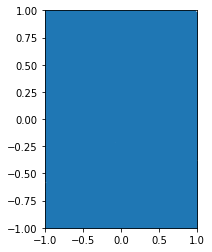

In [11]:
# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)) \
          .collect()
Y = sample.map(itemgetter(1)) \
          .collect()
plt.scatter(X, Y)

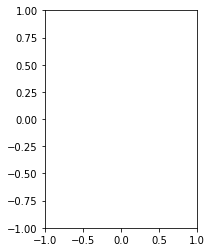

In [12]:
# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle) \
               .cache()
dotsOut = sample.filter(lambda v: not inCircle(v)) \
                .cache()

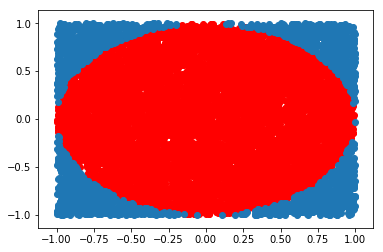

In [13]:
# inside circle
Xin = dotsIn.map(itemgetter(0)) \
            .collect()
Yin = dotsIn.map(itemgetter(1)) \
            .collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)) \
              .collect()
Yout = dotsOut.map(itemgetter(1)) \
              .collect()
plt.scatter(Xout, Yout)

In [14]:
pi = 4.0 * (dots.filter(inCircle).count()*1.0 / TOTAL)
print("The estimation of \pi is:", pi)

The estimation of \pi is: 3.139316
